In [6]:
import requests
import patoolib

results = 'opinion-lexicon-English.rar'
patoolib.extract_archive(results, outdir='.')

print(results)

patool: Extracting opinion-lexicon-English.rar ...
patool: running "C:\Program Files\WinRAR\rar.EXE" x -- C:\Users\Adele\Anaconda3\Scripts\opinion-lexicon-English.rar
patool:     with cwd=.
patool: ... opinion-lexicon-English.rar extracted to `.'.
opinion-lexicon-English.rar


In [8]:
#opinion lexicon on small data set - testFile 
#results put into spreadsheet
import pandas as pd
import csv
from nltk.corpus import stopwords
import re 

def clean(tweet):
    operators = set(('will', 'can', 'no', 'nor', 'not', 'own', 'too', 'very', 'same', 'should', 'again'))
    newStopwords = set(stopwords.words('english')) - operators
    
    lowerTweet = tweet.lower()
    cleanTweet = re.sub(r'!|\.|:', '', lowerTweet)
    split = cleanTweet.split()
    
    filteredTweet = []
    
    for word in split:
        if word not in newStopwords:
            filteredTweet.append(word)
            
    return filteredTweet

def intersect(a, b):
    return list(set(a) & set(b))

def calculateSentenceSentiment(positive, negative):
    if positive == 0 and negative == 0:
        sentiment = 0 
    else: 
        sentiment = (positive - negative)/(positive + negative)
    return(sentiment)

tweets = pd.read_csv('testFile.csv', encoding ='ISO-8859-1')

positiveWords = pd.read_csv('positiveWords.csv', encoding ='ISO-8859-1').values.flatten()
negativeWords = pd.read_csv('negativeWords.csv', encoding ='ISO-8859-1').values.flatten()

sentimentScore = []

tweet = tweets['tweet']

for row in tweet:
    splitTweet = clean(row)
    positiveScore = len(intersect(positiveWords, splitTweet))
    negativeScore = len(intersect(negativeWords, splitTweet))
    sentimentScore.append(calculateSentenceSentiment(positiveScore, negativeScore))

newColumn = pd.DataFrame({'Opinion Lexicon': sentimentScore})
tweets = tweets.merge(newColumn, left_index = True, right_index = True)
tweets.to_csv('testFile.csv')



In [12]:
#get all positive and negative words
import csv
#list of postive and negative words from Minqing Hu and Bing Liu - "Mining and Summarizing Customer Reviews." 
#Proceddings of the ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (KDD-2004),
#Aug 22-25, 2004, Seattle. Washington, USA

with open(r'negativeWords.csv', 'w', newline='', encoding='utf-8') as csvFile:
    csvWriter = csv.writer(csvFile)
    for negative in negativeWords:
        csvWriter.writerow([negative])        
  
with open(r'positiveWords.csv', 'w', newline='', encoding='utf-8') as csvFile:
    csvWriter = csv.writer(csvFile)
    for positive in positiveWords:
        csvWriter.writerow([positive])
        


                   a+
0              abound
1             abounds
2           abundance
3            abundant
4          accessable
5          accessible
6             acclaim
7           acclaimed
8         acclamation
9            accolade
10          accolades
11      accommodative
12       accomodative
13         accomplish
14       accomplished
15     accomplishment
16    accomplishments
17           accurate
18         accurately
19         achievable
20        achievement
21       achievements
22         achievible
23             acumen
24          adaptable
25           adaptive
26           adequate
27         adjustable
28          admirable
29          admirably
...               ...
1975            witty
1976              won
1977           wonder
1978        wonderful
1979      wonderfully
1980        wonderous
1981      wonderously
1982          wonders
1983         wondrous
1984              woo
1985             work
1986         workable
1987           worked
1988      

C:\Users\Adele\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


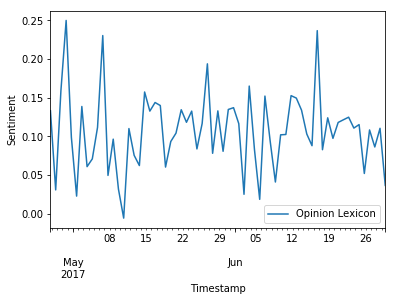

In [5]:
#graph of opinion lexicon vs timestamp
import pandas as pd
import csv
%matplotlib inline
import matplotlib.pyplot as plt

tweets = pd.read_csv('OpinionLexiconSentiment.csv', encoding ='ISO-8859-1')

table = tweets[['Timestamp', 'Opinion Lexicon']]

table['Timestamp'] = pd.to_datetime(table['Timestamp'], format='%d/%m/%Y %H:%M') 

meanSentiment = table.groupby(pd.Grouper(key='Timestamp', freq='24h', base=17)).mean()

graph = meanSentiment.plot(y='Opinion Lexicon')
graph.set_ylabel("Sentiment")


In [3]:
#testing accuracy of textblob on prelabled data - Sentiment140
#need to set <0 to negative, >0 to postitive and 0 to neutral
import pandas as pd
import csv
from nltk.corpus import stopwords
import re 

def clean(tweet):
    operators = set(('will', 'can', 'no', 'nor', 'not', 'own', 'too', 'very', 'same', 'should', 'again'))
    newStopwords = set(stopwords.words('english')) - operators
    
    lowerTweet = tweet.lower()
    #remove http link 
    new = re.sub(r'http.?:\/\/[^\s]+[\s]?', '', lowerTweet)
    #remove numbers,hashtags,cashtags and usernames
    cleanTweet = re.sub(r'(\@\S*)|\$|\#|\.+|\,|\'', '', new)
    split = cleanTweet.split()
    
    filteredTweet = []
    
    for word in split:
        if word not in newStopwords:
            filteredTweet.append(word)
            
    return filteredTweet

def intersect(a, b):
    return list(set(a) & set(b))

def calculateSentenceSentiment(positive, negative):
    if positive == 0 and negative == 0:
        sentiment = 0 
    else: 
        sentiment = (positive - negative)/(positive + negative)
    return(sentiment)

tweets = pd.read_csv('Sentiment140.csv', encoding ='ISO-8859-1')

positiveWords = pd.read_csv('positiveWords.csv', encoding ='ISO-8859-1').values.flatten()
negativeWords = pd.read_csv('negativeWords.csv', encoding ='ISO-8859-1').values.flatten()

predictedSentiment = []
realSentiment = []

tweet = tweets['Tweet']

for row in tweet:
    splitTweet = clean(row)
    positiveScore = len(intersect(positiveWords, splitTweet))
    negativeScore = len(intersect(negativeWords, splitTweet))
    Sentiment = calculateSentenceSentiment(positiveScore, negativeScore)
    if Sentiment < 0:
        type = 'negative'
    elif Sentiment > 0:
        type = 'positive'
    else: 
        type = 'neutral'
    predictedSentiment.append(type)
    
for index, row in tweets.iterrows():
    realSentiment.append(row.Sentiment)
    
def getAccuracy(real, predicted):
    correct = 0
    for i in range(len(real)):
        if real[i] == predicted[i]:
            correct += 1
    print(correct)
    return (correct/float(len(real))) * 100.0
    
percentageAccuracy = getAccuracy(realSentiment, predictedSentiment)
print( percentageAccuracy )

318
63.85542168674698
